<img src="http://certificate.tpq.io/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# EPAT Session 1

**Executive Program in Algorithmic Trading**

**_Vectorized Backtesting_**

Prof. Dr. Yves J. Hilpisch | The Python Quants GmbH | http://tpq.io

<a href="http://shop.oreilly.com/product/0636920269861.do" target="_blank"><img src="https://hilpisch.com/aiif_cover.png" width="300px" align="left" border="1px"></a>

## Basic Imports

In [1]:
import numpy as np
import pandas as pd
from pylab import plt
plt.style.use('seaborn')
pd.set_option('mode.chained_assignment', None)

## Reading Financial Data

In [2]:
url = 'http://hilpisch.com/aiif_eikon_eod_data.csv'  # EOD data
# url = 'http://hilpisch.com/aiif_eikon_id_data.csv'  # intraday data

In [3]:
raw = pd.read_csv(url, index_col=0, parse_dates=True).dropna()

In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


In [5]:
raw.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37


In [6]:
raw.tail()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2019-12-24,284.27,157.38,59.41,1789.21,229.91,321.23,3223.38,12.67,1.1087,1498.8100,28.66,141.27
2019-12-26,289.91,158.67,59.82,1868.77,231.21,322.94,3239.91,12.65,1.1096,1511.2979,29.08,142.38
2019-12-27,289.80,158.96,60.08,1869.80,230.66,322.86,3240.02,13.43,1.1175,1510.4167,28.87,142.33
2019-12-30,291.52,157.59,59.62,1846.89,229.80,321.08,3221.29,14.82,1.1197,1515.1230,29.49,142.63
2019-12-31,293.65,157.70,59.85,1847.84,229.93,321.86,3230.78,13.78,1.1210,1517.0100,29.28,142.90


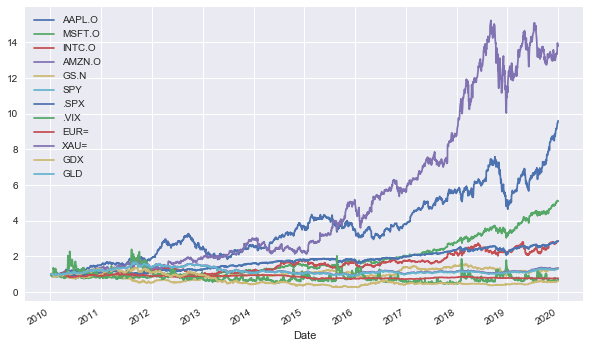

In [7]:
(raw / raw.iloc[0]).plot(figsize=(10, 6));

## Efficient Markets

In [12]:
sym = 'AAPL.O'
# sym = 'EUR='

In [10]:
data = pd.DataFrame(raw[sym])

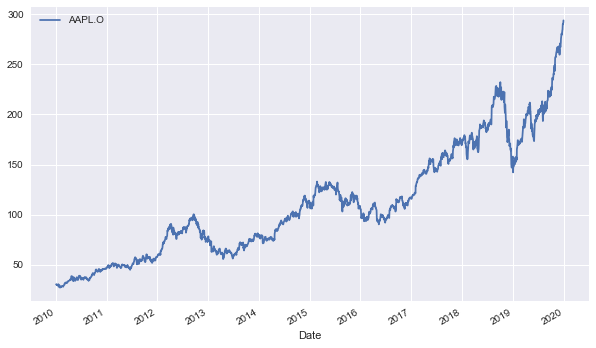

In [11]:
data.plot(figsize=(10, 6));

In [14]:
lags = 10
cols = list()
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    data[col] = data[sym].shift(lag)
    cols.append(col)

In [15]:
cols

['lag_1',
 'lag_2',
 'lag_3',
 'lag_4',
 'lag_5',
 'lag_6',
 'lag_7',
 'lag_8',
 'lag_9',
 'lag_10']

In [16]:
data.head(8)

,AAPL.O,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10
Date,,,,,,,,,,,
2010-01-04,30.572827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,30.625684,30.572827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,30.138541,30.625684,30.572827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,30.082827,30.138541,30.625684,30.572827,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,30.282827,30.082827,30.138541,30.625684,30.572827,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,30.015684,30.282827,30.082827,30.138541,30.625684,30.572827,NaN,NaN,NaN,NaN,NaN
2010-01-12,29.674256,30.015684,30.282827,30.082827,30.138541,30.625684,30.572827,NaN,NaN,NaN,NaN
2010-01-13,30.092827,29.674256,30.015684,30.282827,30.082827,30.138541,30.625684,30.572827,NaN,NaN,NaN


In [17]:
data.dropna(inplace=True)

In [22]:
reg = np.linalg.lstsq(data[cols], data[sym], rcond=-1)[0]

(10,)

<BarContainer object of 10 artists>

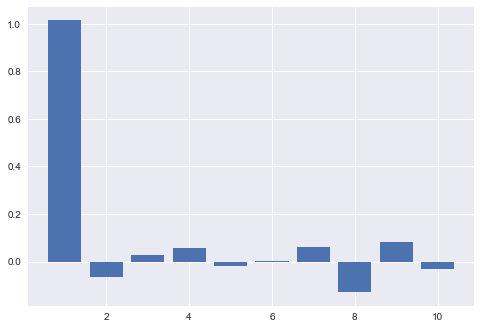

In [25]:
plt.bar(np.arange(len(reg))+1,reg)

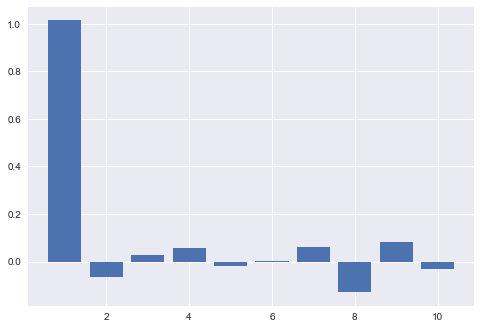

In [26]:
plt.bar(np.arange(len(reg)) + 1, reg);

## Simple Trading Strategy

In [27]:
sym = 'EUR='

In [28]:
data = pd.DataFrame(raw[sym])

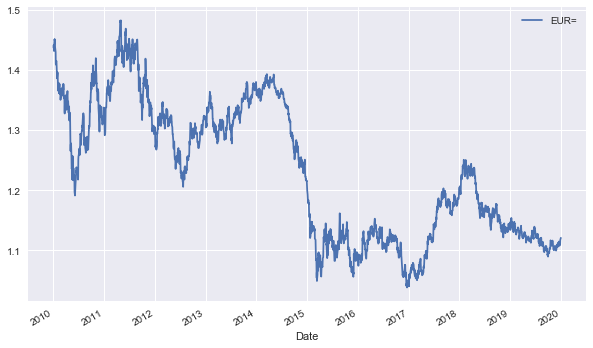

In [29]:
data.plot(figsize=(10, 6));

In [30]:
data['SMA1'] = data[sym].rolling(42).mean()

In [31]:
data['SMA2'] = data[sym].rolling(252).mean()

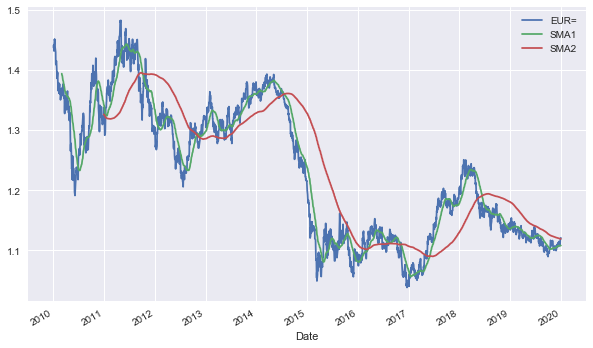

In [32]:
data.plot(figsize=(10, 6));

In [33]:
data.dropna(inplace=True)

In [34]:
# data['p'] = np.where(data['SMA1'] > data['SMA2'], 'long', 'short')
data['p'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)

In [35]:
data

,EUR=,SMA1,SMA2,p
Date,,,,
2010-12-31,1.3377,1.342579,1.326218,1
2011-01-03,1.3351,1.340945,1.325798,1
2011-01-04,1.3301,1.338940,1.325374,1
2011-01-05,1.3151,1.336448,1.324874,1
2011-01-06,1.3001,1.333995,1.324351,1
...,...,...,...,...
2019-12-24,1.1087,1.107698,1.119630,-1
2019-12-26,1.1096,1.107740,1.119529,-1
2019-12-27,1.1175,1.107924,1.119428,-1


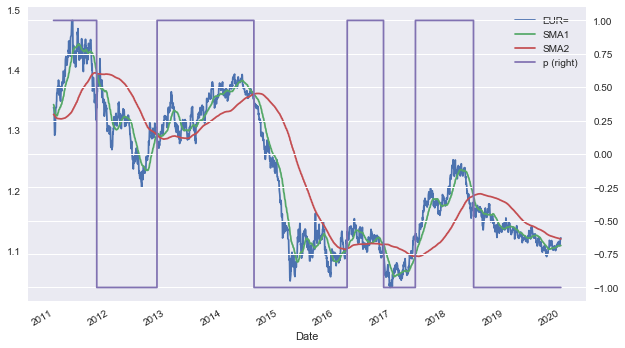

In [36]:
data.plot(secondary_y='p', figsize=(10, 6));

## Vectorized Backtesting

In [39]:
data['r'] = np.log(data[sym] / data[sym].shift(1))

In [40]:
data['r_'] = -1 * data['r']  # negative market returns

In [41]:
# np.random.choice?

In [42]:
data['rn'] = np.random.choice([1, -1], size=len(data)) * data['r']

In [43]:
data['s'] = data['r'] * data['p'].shift(1)

In [44]:
data

,EUR=,SMA1,SMA2,p,r,r_,rn,s
Date,,,,,,,,
2010-12-31,1.3377,1.342579,1.326218,1,NaN,NaN,NaN,NaN
2011-01-03,1.3351,1.340945,1.325798,1,-0.001946,0.001946,-0.001946,-0.001946
2011-01-04,1.3301,1.338940,1.325374,1,-0.003752,0.003752,-0.003752,-0.003752
2011-01-05,1.3151,1.336448,1.324874,1,-0.011341,0.011341,-0.011341,-0.011341
2011-01-06,1.3001,1.333995,1.324351,1,-0.011472,0.011472,-0.011472,-0.011472
...,...,...,...,...,...,...,...,...
2019-12-24,1.1087,1.107698,1.119630,-1,0.000090,-0.000090,0.000090,-0.000090
2019-12-26,1.1096,1.107740,1.119529,-1,0.000811,-0.000811,-0.000811,-0.000811
2019-12-27,1.1175,1.107924,1.119428,-1,0.007094,-0.007094,-0.007094,-0.007094


In [45]:
data[['r', 'r_', 'rn', 's']].sum()  # sum of log returns

r    -0.176731
r_    0.176731
rn   -0.272094
s     0.253121
dtype: float64

In [46]:
data[['r','r_', 'rn', 's']].sum().apply(np.exp)  # gross performance

r     0.838006
r_    1.193310
rn    0.761783
s     1.288039
dtype: float64

In [47]:
data[['r', 'r_', 'rn', 's']].sum().apply(np.exp) - 1  # net performance

r    -0.161994
r_    0.193310
rn   -0.238217
s     0.288039
dtype: float64

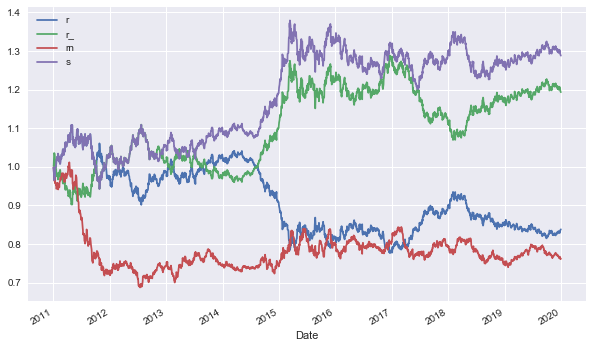

In [48]:
data[['r', 'r_', 'rn', 's']].cumsum(
        ).apply(np.exp).plot(figsize=(10, 6));  # gross performance over time

## Advanced Trading Strategy

### Data Preprocessing

In [ ]:
sym = 'EUR='

In [ ]:
data = pd.DataFrame(raw[sym])

In [ ]:
data['r'] = np.log(data[sym] / data[sym].shift(1))

In [ ]:
data.dropna(inplace=True)

In [ ]:
data['d'] = np.sign(data['r'])
data['d'] = data['d'].astype(int)

In [ ]:
data

In [ ]:
data['r_norm'] = (data['r'] - data['r'].mean()) / data['r'].std()

In [ ]:
lags = 5
cols = list()
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    data[col] = data['r_norm'].shift(lag)
    cols.append(col)
data.dropna(inplace=True)
# data[cols] = data[cols].astype(int)

In [ ]:
# 2 ** lags

In [ ]:
data

### Model Fitting (In-Sample)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [ ]:
model = GaussianNB()
model

In [ ]:
model = LogisticRegression()
model

In [ ]:
model = MLPClassifier(hidden_layer_sizes=[32], shuffle=False, max_iter=500)
model

In [ ]:
model.fit(data[cols], data['d'])

### Vectorized Backtesting (In-Sample)

In [ ]:
data['p'] = model.predict(data[cols])

In [ ]:
model.classes_

In [ ]:
model.predict_proba(data[cols])

In [ ]:
data.tail()

In [ ]:
data['s'] = data['p'] * data['r']

In [ ]:
data['r_'] = -1 * data['r']  # negative market returns

In [ ]:
data['rn'] = np.random.choice([1, -1], size=len(data)) * data['r']  # random strategy returns

In [ ]:
data[['r','r_', 'rn', 's']].sum().apply(np.exp)  # gross performance

In [ ]:
data[['r', 's']].cumsum(
        ).apply(np.exp).plot(figsize=(10, 6));  # gross performance over time

In [ ]:
data[['r', 'r_', 'rn', 's']].cumsum(
        ).apply(np.exp).plot(figsize=(10, 6));  # gross performance over time

### Train-Test Split

In [ ]:
split = int(len(data) * 0.7)

In [ ]:
train = data.iloc[:split].copy()

In [ ]:
test = data.iloc[split:].copy()

### Training (In-Sample)

In [ ]:
model.fit(train[cols], train['d'])

In [ ]:
train['p'] = model.predict(train[cols])

In [ ]:
train['s'] = train['p'] * train['r']

In [ ]:
train[['r', 's']].cumsum(
        ).apply(np.exp).plot(figsize=(10, 6));  # gross performance over time

### Testing (Out-of-Sample)

In [ ]:
test['p'] = model.predict(test[cols])

In [ ]:
test['s'] = test['p'] * test['r']

In [ ]:
test[['r', 's']].cumsum(
        ).apply(np.exp).plot(figsize=(10, 6));  # gross performance over time

## Object-Oriented Implementation

In [ ]:
type(data)

In [ ]:
data.columns  # instance attribute

In [ ]:
data[['lag_1', 'lag_2', 'lag_3']].corr()  # method

In [ ]:
class MyClass:
    pass

In [ ]:
mc = MyClass()

In [ ]:
type(MyClass)

In [ ]:
type(mc)

In [ ]:
mc.data_attribute = 'This is an attribute.'

In [ ]:
mc.data_attribute

In [ ]:
mc.data = data

### Financial Data Class

In [ ]:
class FinancialData:
    url = 'http://hilpisch.com/aiif_eikon_eod_data.csv'
    def __init__(self, symbol):  # called during instantiation
        self.symbol = symbol  # instance attribute
        self.prepare_data()  # calls the method
    def prepare_data(self):  # instance method
        self.raw = pd.read_csv(self.url, index_col=0,
                               parse_dates=True).dropna()
        self.data = pd.DataFrame(self.raw[self.symbol])
        self.data['r'] = np.log(self.data / self.data.shift(1))
    def plot_data(self, cols=None):
        if cols is None:
            cols = [self.symbol]
        self.data[cols].plot(figsize=(10, 6))

In [ ]:
fd = FinancialData('EUR=')  # instantiation of an object

In [ ]:
fd.url  # class attribute

In [ ]:
fd.symbol  # instance attribute

In [ ]:
# fd.prepare_data()  # instance method

In [ ]:
fd.data.info()

In [ ]:
fd.plot_data()

### Vectorized Backtesting Class

In [ ]:
class SMABacktester(FinancialData):
    def prepare_statistics(self):
        self.data['SMA1'] = self.data[self.symbol].rolling(self.SMA1).mean()
        self.data['SMA2'] = self.data[self.symbol].rolling(self.SMA2).mean()
    def run_strategy(self, SMA1, SMA2):
        self.SMA1 = SMA1
        self.SMA2 = SMA2
        self.prepare_statistics()
        self.data['p'] = np.where(self.data['SMA1'] > self.data['SMA2'], 1, -1)
        self.data['s'] = self.data['p'].shift(1) * self.data['r']
        self.results = self.data.iloc[self.SMA2:].copy()
        res = self.results[['r', 's']].sum().apply(np.exp)
        return res
    def optimize_parameters(self, SMA1_range, SMA2_range):
        # simple brute force optimizations
        # might e.g. to add annualized returns for
        # better comparison
        self.ores = pd.DataFrame()
        for SMA1 in SMA1_range:
            for SMA2 in SMA2_range:
                res = self.run_strategy(SMA1, SMA2)
                self.ores = self.ores.append(pd.DataFrame(
                            {'SMA1': SMA1, 'SMA2': SMA2,
                             'BENCH': res['r'], 'STRAT': res['s'],
                            'OUTPERF': res['s'] - res['r']}, index=[0,]),
                             ignore_index=True)
        self.ores = self.ores.sort_values('STRAT', ascending=False)
        return self.ores.iloc[0]
    def plot_results(self):
        self.results[['r', 's']].cumsum().apply(np.exp).plot(figsize=(10, 6),
            title=f'{self.symbol} | SMA1={self.SMA1} | SMA2={self.SMA2}')

In [ ]:
sma = SMABacktester('GLD')

In [ ]:
sma.run_strategy(SMA1=42, SMA2=252)

In [ ]:
sma.plot_results()

In [ ]:
# BEWARE OF DATA SNOOPING & OVERFITTING THROUGHOUT!!
sma.optimize_parameters(SMA1_range=[10, 20, 30, 40],
                        SMA2_range=[150, 200, 250, 300])

In [ ]:
%%time
opt = sma.optimize_parameters(SMA1_range=range(15, 60, 2),
                        SMA2_range=range(150, 301, 5))
opt

In [ ]:
sma.ores.head()

In [ ]:
sma.run_strategy(int(opt['SMA1']), int(opt['SMA2']))

In [ ]:
sma.plot_results()

In [ ]:
# sma.results[['r', 's']].cumsum().apply(np.exp).plot(figsize=(10, 6),
#            title=f'{sma.symbol} | SMA1={sma.SMA1} | SMA2={sma.SMA2}');

In [ ]:
sma.data.head()

In [ ]:
sma.data.tail()

In [ ]:
sma.plot_data(cols=[sma.symbol, 'SMA1', 'SMA2'])

In [ ]:
sma.data[sma.SMA2 - 3:].head(6)

In [ ]:
sma.results.head()

In [ ]:
%%time
results = {}
# BEWARE OF DATA SNOOPING & OVERFITTING THROUGHOUT!!
for symbol in ['AAPL.O', 'EUR=', 'GLD']:
    sma = SMABacktester(symbol)
    opt = sma.optimize_parameters(SMA1_range=range(15, 60, 2),
                            SMA2_range=range(150, 301, 10))
    results[symbol] = opt

In [ ]:
for symbol in results.keys():
    print(symbol)
    print(results[symbol])
    print('\n')

<img src="http://certificate.tpq.io/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>